In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Questão 1
### Existem valores faltantes ou outliers no dataset? Se sim, como você abordaria o tratamento dessas inconsistências? Explique as técnicas que utilizaria para lidar com essas questões.


In [171]:
df_diabetes = pd.read_csv("diabetes.csv")

In [170]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,627.0,50,True
1,1,85.0,66.0,29.0,0.0,26.6,351.0,31,False
2,8,183.0,64.0,0.0,0.0,23.3,672.0,32,True
3,1,89.0,66.0,23.0,94.0,28.1,167.0,21,False
4,0,137.0,40.0,35.0,168.0,43.1,2288.0,33,True


In [111]:
df_diabetes.shape

(768, 9)

In [112]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   764 non-null    float64
 2   BloodPressure             748 non-null    float64
 3   SkinThickness             758 non-null    float64
 4   Insulin                   765 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


##### Com base nos valores acima, é possível notar que as colunas algumas colunas possumem valores faltantes, pois o esperado é que todas as colunas tivessem 768 valores não nulos.

##### Uma das formas de tratar esses valores é escluindo essas linhas do conjunto de dados a ser utilizado na análise.
##### Pode-se também preencher com um valor fixo, um valor médio relacionado a determinada feature, e por interpolação.
##### O escolhido foi o dropna, pois no caso poucas linhas se apresentam como nulas, o que provavelmente não trará grandes prejuízos à analise dos dados

In [ ]:

df_diabetes = df_diabetes.dropna()
df_diabetes['Outcome'] = df_diabetes['Outcome'].astype(bool)


## Questão 2
### Como as principais variáveis (Glucose, BloodPressure, BMI, etc.) estão distribuídas? Utilize histogramas e boxplots para representar visualmente essas distribuições e analise as características de cada uma

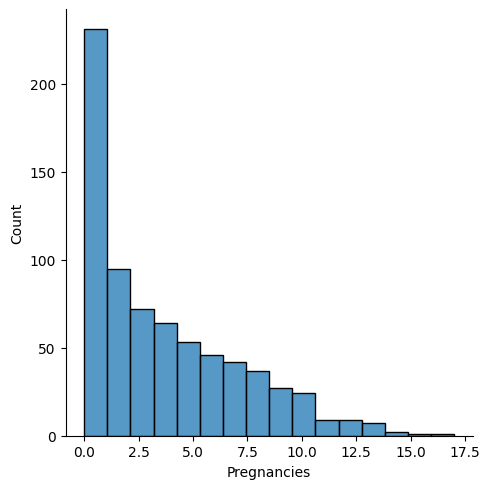

In [114]:
sns.displot(df_diabetes, x = "Pregnancies")


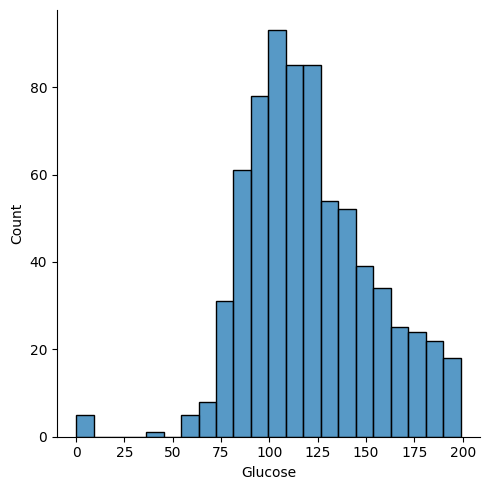

In [115]:
sns.displot(df_diabetes, x = "Glucose")

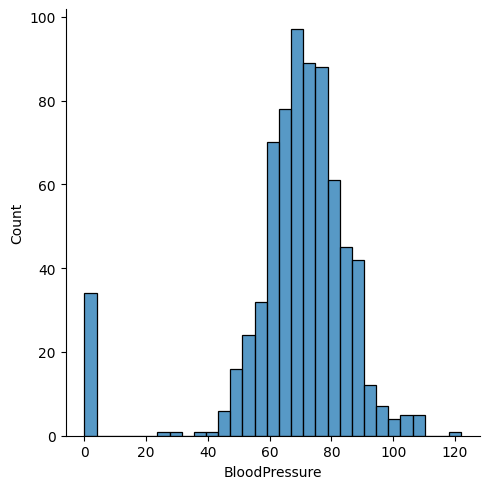

In [116]:
sns.displot(df_diabetes, x = "BloodPressure")

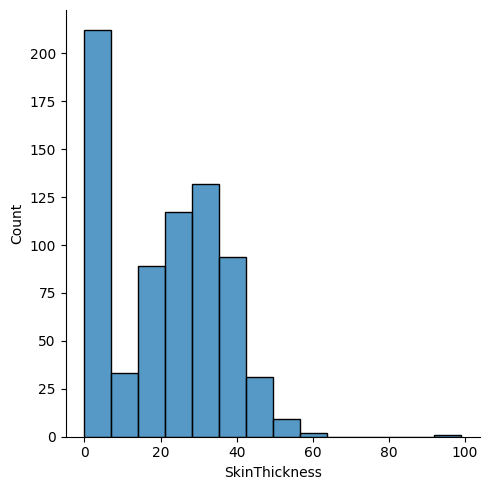

In [117]:
sns.displot(df_diabetes, x = "SkinThickness")

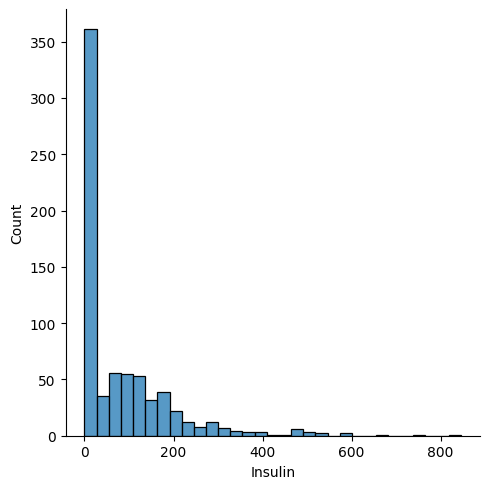

In [118]:
sns.displot(df_diabetes, x = "Insulin")

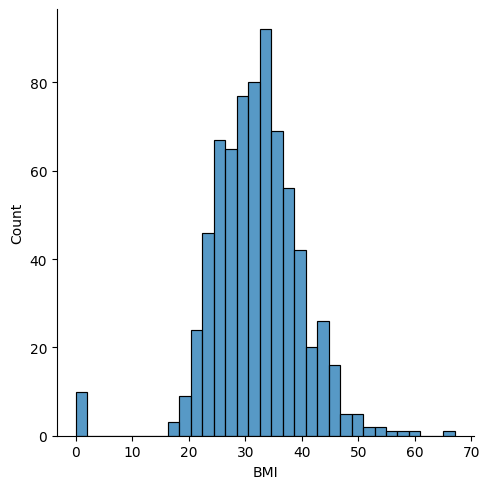

In [119]:
sns.displot(df_diabetes, x = "BMI")

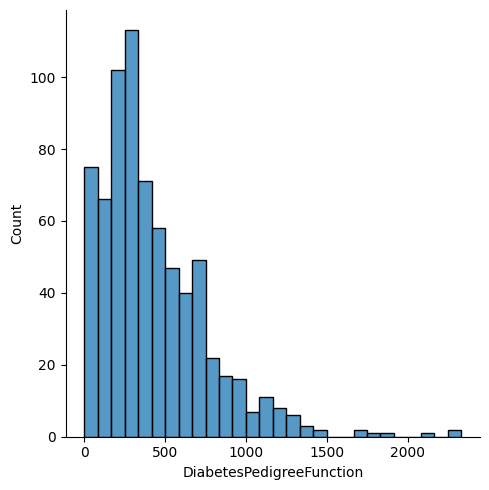

In [120]:
sns.displot(df_diabetes, x = "DiabetesPedigreeFunction")

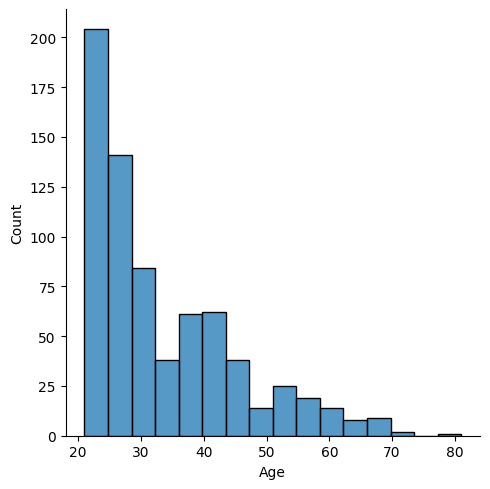

In [121]:
sns.displot(df_diabetes, x = "Age")

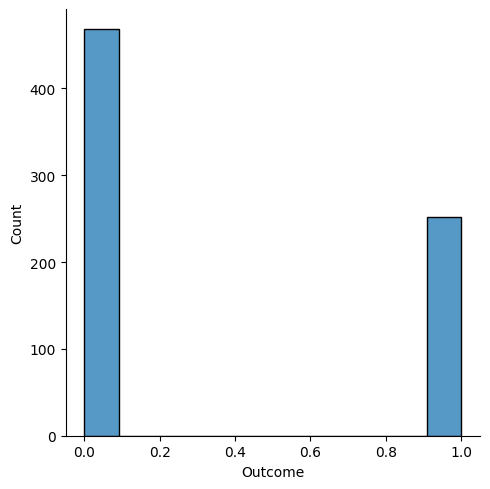

In [122]:
sns.displot(df_diabetes, x = "Outcome")

## Questão 3
#### Existe uma correlação entre a idade dos indivíduos e a presença de diabetes? Realize uma análise estatística (como teste de correlação) e utilize gráficos (como scatter plot ou boxplot) para ilustrar essa relação.


In [123]:
## Teste de Correlação

Sx = 0
Sy = 0
x_bar = df_diabetes['Age'].mean()
y_bar = df_diabetes['Outcome'].mean()
cov_xy = 0


for (index, row) in df_diabetes.iterrows():
  cov_xy+= (row['Age'] - x_bar) * (row['Outcome'] - y_bar)
  Sx+= (row['Age'] - x_bar)**2
  Sy+= (row['Outcome'] - y_bar)**2

print(f"Correlação: {cov_xy/np.sqrt(Sx*Sy)}")

Correlação: 0.21922849141338463


<Axes: xlabel='Outcome', ylabel='Age'>

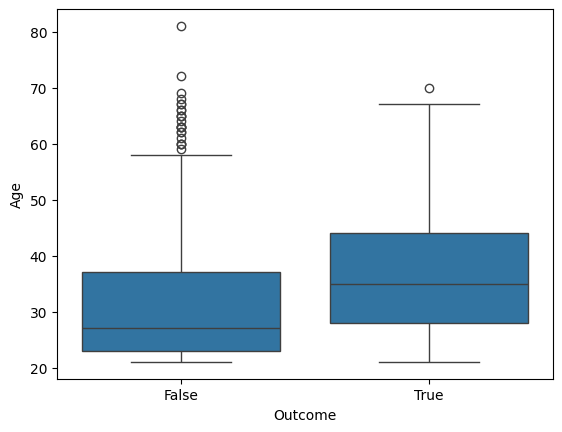

In [124]:
sns.boxplot(data=df_diabetes, x="Outcome", y="Age")


#### Como conclusão do teste de correlação, e como pode ser observado pelo gráfico, a idade e a ocorrência de casos de diabetes têm uma correlação positiva fraca.

## Questão 4
#### Quais variáveis apresentam maior correlação com a presença de diabetes? Quais variáveis parecem ser as mais indicativas da presença de diabetes?


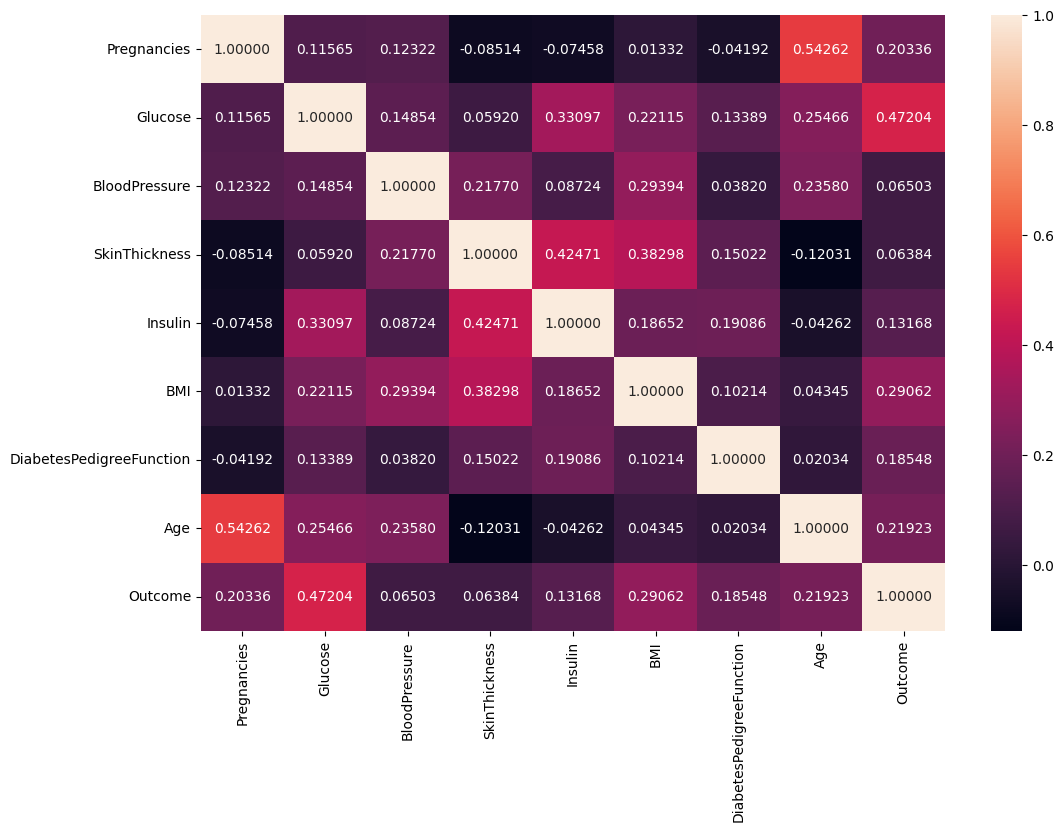

In [138]:
plt.figure(figsize=(12, 8))  
sns.heatmap(df_diabetes.corr(), annot=True, fmt=".5f")
plt.show()  

##### Conforme os dados acima, as variáveis que parecem estar mais ligada com as ocorrências de diabetes são: Glucose, BMI e Age

## Questão 5
#### Existe uma relação entre o IMC dos pacientes e o diagnóstico de diabetes?Compare os valores médios de IMC entre os grupos com e sem diabetes, e analise a diferença estatisticamente.


<Axes: ylabel='BMI'>

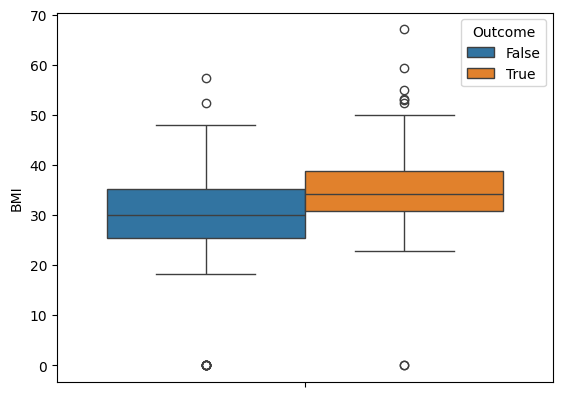

In [126]:
sns.boxplot(df_diabetes, y = "BMI", hue="Outcome")

#### Como é possível notar, a média do IMC das pessas com diabetes é maior que o das pessoas sem diabetes

## Questão 6

#### Existe um valor específico de glicose que pode ser considerado crítico para o diagnóstico de diabetes? Utilize gráficos de dispersão e cálculos estatísticos para investigar esse ponto e definir um limite crítico, se possível.


<Axes: xlabel='Outcome', ylabel='Glucose'>

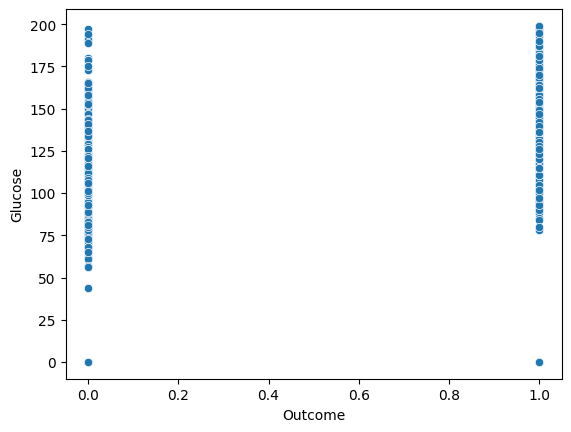

In [127]:
sns.scatterplot(data = df_diabetes, x = "Outcome", y= "Glucose")

## Questão 7

#### Treine um modelo de árvore de decisão para prever a presença de diabetes com base nas variáveis do dataset. Qual foi a acurácia obtida? Discuta os resultados e possíveis melhorias para o modelo

In [128]:
from sklearn.model_selection import train_test_split

X = df_diabetes.drop(columns='Outcome')
y = df_diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [129]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)


In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score

matrix = confusion_matrix(y_test, y_pred)

print(f"""
    F            T
F  {matrix[0][0]}           {matrix[0][1]}
T   {matrix[1][0]}          {matrix[1][1]}
""")

# Mede o quanto o modelo acerta
# Precisão = (FF + PP)/ (FF+PP+FP+PF)
print(f"Precisão: {accuracy_score(y_test, y_pred)}")


    F            T
F  118           31
T   34          33

Precisão: 0.6990740740740741


## Questão 8

#### A variável DiabetesPedigreeFunction está relacionada à presença de diabetes? Pacientes com histórico familiar de diabetes apresentam maior risco? Realize uma análise exploratória e estatística para verificar essa relação.

Média de DiabetesPedigreeFunction para pacientes com diabetes: 510.562619047619
Média de DiabetesPedigreeFunction para pacientes sem diabetes: 378.6156623931624


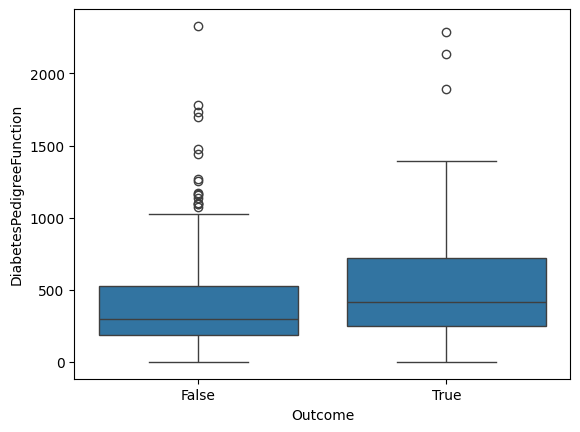

In [ ]:
# Boxplot para visualizar a relação entre DiabetesPedigreeFunction e Outcome
sns.boxplot(data=df_diabetes, x="Outcome", y="DiabetesPedigreeFunction")

# Cálculo das médias
mean_without_diabetes = df_diabetes[df_diabetes['Outcome'] == True]['DiabetesPedigreeFunction'].mean()
print(f"Média de DiabetesPedigreeFunction para pacientes com diabetes: {mean_with_diabetes}")

mean_without_diabetes = df_diabetes[df_diabetes['Outcome'] == False]['DiabetesPedigreeFunction'].mean()
print(f"Média de DiabetesPedigreeFunction para pacientes sem diabetes: {mean_without_diabetes}")

## Questão 9
#### Pacientes com mais de 50 anos têm taxas de diabetes mais altas do que pacientes mais jovens? Utilize estatísticas descritivas e gráficos comparativos para demonstrar as diferenças entre esses dois grupos etários.


Taxa de diabetes em pacientes com mais de 50 anos: 46.15%
Taxa de diabetes em pacientes com 50 anos ou menos: 33.64%


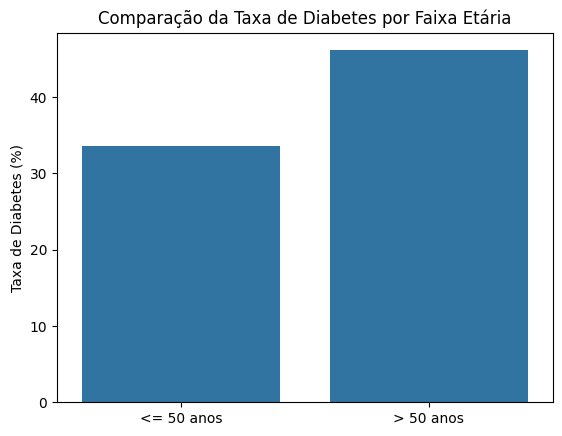

In [135]:
df_diabeteslte50 = df_diabetes[df_diabetes['Age'] <= 50]
df_diabetesgt50 = df_diabetes[df_diabetes['Age'] > 50]

# Calculando as proporções de pacientes com diabetes em cada grupo
rate_diabetes_gt50 = df_diabetesgt50['Outcome'].mean() * 100
rate_diabetes_lte50 = df_diabeteslte50['Outcome'].mean() * 100

print(f"Taxa de diabetes em pacientes com mais de 50 anos: {rate_diabetes_gt50:.2f}%")
print(f"Taxa de diabetes em pacientes com 50 anos ou menos: {rate_diabetes_lte50:.2f}%")

# Visualizando com gráficos
sns.barplot(x=['<= 50 anos', '> 50 anos'], y=[rate_diabetes_lte50, rate_diabetes_gt50])
plt.ylabel('Taxa de Diabetes (%)')
plt.title('Comparação da Taxa de Diabetes por Faixa Etária')
plt.show()

## Questão 10
#### Utilize regressão logística para estimar a probabilidade de um paciente ser diagnosticado com diabetes. Quais variáveis são mais influentes no modelo e como elas impactam a probabilidade de diagnóstico?


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [165]:
X = df_diabetes.drop(columns=['Outcome'])
y = df_diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [166]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [167]:
y_pred = log_reg_model.predict(X_test)

In [168]:
# Features que mais influênciaram a decisão do modelo
coefs = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg_model.coef_[0]
})

coefs


,feature,coefficient
0,Pregnancies,0.101935
1,Glucose,0.039307
2,BloodPressure,-0.014336
3,SkinThickness,-0.003298
4,Insulin,-0.001246
5,BMI,0.083018
6,DiabetesPedigreeFunction,0.001236
7,Age,0.018704


In [169]:

matrix = confusion_matrix(y_test, y_pred)

print(f"""
    F            T
F  {matrix[0][0]}           {matrix[0][1]}
T   {matrix[1][0]}          {matrix[1][1]}
""")

# Mede o quanto o modelo acerta
# Precisão = (FF + PP)/ (FF+PP+FP+PF)
print(f"Precisão: {accuracy_score(y_test, y_pred)}")


    F            T
F  117           17
T   32          50

Precisão: 0.7731481481481481


## Questão 11
#### Quais técnicas de feature engineering podem ser aplicadas para melhorar a previsão do diagnóstico de diabetes utilizando modelos de aprendizado de máquina? Experimente transformar variáveis existentes, criar novas variáveis a partir de combinações ou interações e utilize técnicas como encoding, normalização ou transformação de características. Avalie o impacto dessas mudanças no desempenho de um modelo de aprendizado de máquina (por exemplo, Random Forest ou XGBoost)